# データ生成

> ここでは，サプライ・チェイン最適化で用いる基本的なランダムデータを生成する．生成されたデータは，csvファイルやExcelのファイルとして保管され，様々な最適化システムで用いられる．

In [ ]:
#| default_exp data

In [ ]:
#| include: false
from nbdev.showdoc import *
%reload_ext autoreload
%autoreload 2

In [ ]:
#| export
import glob
import colorlover as cl
import pickle
import numpy as np
#import dash_table
import plotly.graph_objs as go
import plotly.express as px
import plotly
from mypulp import GRB, quicksum, Model
#from gurobipy import GRB, quicksum, Model
import pandas as pd
import random
import string
import datetime
import math
from collections import OrderedDict, defaultdict
import networkx as nx
from IPython.display import Image
#import seaborn as sns
from faker import Faker
from scipy.spatial import KDTree
from scipy.spatial import distance
from geopy.distance import great_circle 
folder = "./data/"
mapbox_access_token = 'pk.eyJ1IjoibWlraW9rdWJvIiwiYSI6ImNqYXQ3dHBqdzR5ZGwyd3BkeG5rOTl0b2UifQ.1utsXNi2V-WdzfWlvCMj_A'

## WebアプリのためのExcelデータの生成

Webアプリで用いるExcelのデータをcsvファイルから生成する．

### 需要予測データ 

- 需要データ: demand_with_promo
- プロモーションデータ: promo 

から

- 需要予測用のExcelデータ： forecast_small.xlsx

を生成する．

In [ ]:
#for forecast
# folder = "../data/"
# fns = ["demand_with_promo", "promo"]
# sheet_name =["demand_with_promo", "promo"]

# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=0)
#     df[fn] = df[fn].iloc[:100,:]

# with pd.ExcelWriter('forecast_small.xlsx') as writer:
#     for i,fn in enumerate(fns):
#         df[fn].to_excel(writer, sheet_name=sheet_name[i], index=False)

### SCBASデータ 

- 需要データ: demand
- 製品データ: prod_for_scbas

から

- SCBAS用のExcelデータ： scbas.xlsx

を生成する．

In [ ]:
# for scbas
# folder = "../data/"
# fns = ["demand", "prod_for_scbas"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=0)
# with pd.ExcelWriter('scbas.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn)

### MELOS-GFデータ 

- 施設データ: melos-gf
- 移動時間データ: time

から

- MELOS-GF用のExcelデータ： melos-gf.xlsx

を生成する．

In [ ]:
#for melos-gf
# folder = "../data/melos/"
# fns = ["melos-gf", "time"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv",index_col=0)
# with pd.ExcelWriter('melos-gf.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn, index=False)

### MELOSデータ 

- 顧客データ： Cust
- 製品データ： Prod
- 需要データ: demand
- 倉庫データ：　DC
- 工場データ: Plnt
- 工場・製品データ: Plnt-Prod
- 移動時間データ: time

から

- MELOS用のExcelデータ： melos.xlsx

を生成する．

In [ ]:
#for melos
# folder = "../data/"
# fns = ["Cust", "Prod", "demand", "DC", "Plnt", "Plnt-Prod", "time"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=0)
# with pd.ExcelWriter('melos.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn, index=False)

### MESSAデータ 

- 在庫地点（段階）データ： ssa01
- 部品展開表データ： ssa_bom01

から

- MESSA用のExcelデータ： messa.xlsx

を生成する．

In [ ]:
#for messa
# folder = "../data/bom/"
# fns = ["ssa01", "ssa_bom01"]
# sheet_name =["stage", "bom"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=0)
# with pd.ExcelWriter('messa.xlsx') as writer:
#     for i,fn in enumerate(fns):
#         df[fn].to_excel(writer, sheet_name=sheet_name[i], index=False)

### OptSeqデータ 

- act: 作業データ
- res: 資源データ
- mode: モードデータ
- act_mode: 作業・モードデータ
- mode_res: モード・資源データ
- temp: 時間制約データ
- non_res : 再生不能資源の右辺定数と制約の向きを表すデータ
- non_lhs : 再生不能資源の項（係数、作業、モードの組）を表すデータ
- state : 状態データ

から

- OptSeq用のExcelデータ： optseq.xlsx

を生成する．


In [ ]:
#for optseq
# folder = "../data/optseq/"
# name ="ex22_"
# fns = ["act","mode", "res", "act_mode", "mode_res", "temp", "non_res", "non_lhs", "state" ]
# df ={}
# for i in fns:
#     fn =name+i
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=1)
#     df[fn].drop("Unnamed: 0", axis=1, inplace=True)
# with pd.ExcelWriter('optseq.xlsx') as writer:
#     for i in fns:
#         fn =name+i
#         df[fn].to_excel(writer, sheet_name=i)

### METROデータ 

- node: 作業データ
- job: 資源データ
- vehicle: モードデータ
- shipment: 作業・モードデータ
- break: モード・資源データ
- 移動時間データ: time

から

- METRO用のExcelデータ： metro.xlsx

を生成する．

In [ ]:
#for metro
# folder = "../data/metroIV/"
# fns = ["node", "job", "vehicle", "shipment", "break", "time"]
# df ={}
# for fn in fns:
#     if fn =="break":
#         df[fn] = pd.read_csv(folder+fn+".csv", index_col=1)
#     else:
#         df[fn] = pd.read_csv(folder+fn+"02.csv", index_col=1)
#     df[fn].drop("Unnamed: 0", axis=1, inplace=True)
# with pd.ExcelWriter('metro.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn)

### OptShiftデータ 

- period : 期間データフ
- break : 休憩データ
- day : 日データ
- job : ジョブデータ
- staff : スタッフデータ
- requirement : 必要人数データ

から

- OptShift用のExcelデータ： optshift.xlsx

を生成する．

In [ ]:
#for optshift
# folder = "../data/shift/"
# fns = ["period", "break", "day", "job", "staff", "requirement"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=1)
#     df[fn].drop("Unnamed: 0", axis=1, inplace=True)
# with pd.ExcelWriter('optshift.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn)

### OptLotデータ 

- lotprod: 製品データ
- production : 生産情報データ
- bom : 部品展開表データ
- plnt-demand : 工場における（期別・製品別の）需要を入れたデータ
- resource : 資源データ

から

- OptLot用のExcelデータ： optlot.xlsx

を生成する．


In [ ]:
#| include: false
#for optlot
# folder = "../data/"
# fns = ["lotprod", "production", "bom", "plnt-demand", "resource"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=1)
#     try:
#         df[fn].drop("Unnamed: 0", axis=1, inplace=True)    
#     except:
#         pass
# with pd.ExcelWriter('optlot.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn)

### SENDOデータ 

- DC: 施設（倉庫）データ
- od: 需要（OD)データ

から

- SENDO用のExcelデータ： sendo.xlsx

を生成する．


In [ ]:
#| include: false
#for sendo
# folder = "../data/"
# fns = ["DC", "od"]
# df ={}
# for fn in fns:
#     df[fn] = pd.read_csv(folder+fn+".csv", index_col=0)
# #     try:
# #         df[fn].drop("Unnamed: 0", axis=1, inplace=True)    
# #     except:
# #         pass
# with pd.ExcelWriter('sendo.xlsx') as writer:
#     for fn in fns:
#         df[fn].to_excel(writer, sheet_name=fn)

#hide
## 郵便番号一覧から離島を削除

In [ ]:
#| include: false
# df = pd.read_csv(folder+"zipcode.csv")  # 日本の郵便番号データの読み込み
# island_df = pd.read_csv(folder+"islands.csv") 
# df.set_index("zip", inplace=True)
# new_df = df.drop( island_df.zip, axis=0 )
# new_df.to_csv(folder + "zipcode_no_island.csv")

## 顧客データのランダム生成関数 generate_cust

日本の郵便番号データからランダムに地点をサンプリングすることによって、仮想の顧客データを生成する。
社名はFakeパッケージを用いて生成する。 配送計画問題の例題を作成する場合は、あまり遠い地点を選ばないように、都道府県名を引数 prefecture で指定する。
例えば、ロジスティクス・ネットワーク設計モデルやサービスネットワーク設計モデルにおいては、日本全国からランダムに選択し、配送計画モデルにおいては1つの県から選択する。

引数：

- num_locations: 地点数
- random_seed: 乱数の種（同じ問題例が欲しい場合には、同じ種を与える。）
- prefecture: 都道府県名（例えば"千葉県"のような文字列で与える。）省略するか空白の文字列の場合には、日本全国から選択する。

返値： 

- ランダムに生成された顧客データ  

データの列で必須なものは，名前 (name) と緯度・経度 (lat, lon; latitude, Longitudeの略) があれば良いが、リアリティを出すために，郵便番号と住所情報も付加されているが，最適化で必要な列は以下のものだけである．

顧客データの列：

- name: 名称
- lat: 緯度
- lon: 経度

In [ ]:
#| export
#郵便番号データは分けて保管する（ファイルが大きすぎるため）
def split_csv_file(input_file, output_prefix, chunk_size):
    # CSVファイルを読み込む
    reader = pd.read_csv(input_file, chunksize=chunk_size)
    # 分割したCSVファイルを保存するカウンター
    file_count = 1
    # 分割したCSVファイルを処理するループ
    for chunk in reader:
        # 分割されたCSVファイルの名前を作成
        output_file = f"{output_prefix}_{file_count}.csv"
        # 分割されたCSVファイルを保存
        chunk.to_csv(output_file, index=False)
        # ファイルカウンターをインクリメント
        file_count += 1

# 入力CSVファイルのパス
# input_file = folder+"zipcode_no_island.csv"

# # 分割したCSVファイルの出力先とファイル名のプレフィックス
# output_prefix = folder+"output_chunk"

# # 1つのファイルに含める行数
# chunk_size = 10000

# # CSVファイルを分割して保存
# split_csv_file(input_file, output_prefix, chunk_size)

In [ ]:
#| export
#読み込み
def combine_csv_files(input_prefix):
    # ファイル名パターンに基づいて分割されたCSVファイルのリストを取得
    file_list = glob.glob(input_prefix + "*.csv")
    
    # 分割されたCSVファイルを読み込んで結合
    combined_df = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)

    return combined_df 
    # 結合したデータフレームをCSVファイルとして保存
    #combined_df.to_csv(output_file, index=False)

# # 分割されたCSVファイルのプレフィックスと出力ファイル名
# input_prefix = folder+"output_chunk_"

# # 分割されたCSVファイルを結合して元のデータフレームを再構築
# df = combine_csv_files(input_prefix)

In [ ]:
#| export
def generate_cust(num_locations=10, random_seed=1, prefecture=None):
    """
    顧客データをランダムに生成する関数
    """
    # if no_island:
    #     df = pd.read_csv(folder+"zipcode_no_island.csv") 
    # else:
    #     df = pd.read_csv(folder+"zipcode.csv") 
    input_prefix = folder+"output_chunk_"
    df = combine_csv_files(input_prefix)
    if prefecture == None:
        if num_locations > len(df):
            print("number of customers is too large! It exceeds the number of zip points in Japan!")
            return -1
        else:
            cust_df = df.sample(n=num_locations, random_state=random_seed)
    else:
        cust_df = df[df.name1 == prefecture]
        if num_locations > len(cust_df):
            print("number of customers is too large! Change the prefecture or set to None!")
            return -1
        else:
            cust_df = cust_df.sample(n=num_locations, random_state=random_seed)

    cust_df.reset_index(inplace=True)
    cust_df.drop("index", axis=1, inplace=True)
    # cust_df.columns
    cust_df.rename(columns={"name1": "都道府県", "name2": "市区町村", "name3": "大字",
                            "latitude": "lat", "longitude": "lon"}, inplace=True)

    Faker.seed(random_seed)
    fake = Faker(['ja_JP'])
    fake_name = []
    fake_name_set = set([])
    for _ in range(len(cust_df)):
        while 1:
            temp = fake.company() + f" 第 {random.randint(1,100)} 支店" 
            if temp not in fake_name_set:
                fake_name.append(temp)
                fake_name_set.add(temp)
                break
            
    cust_df["name"] = fake_name
    
    cust_df = cust_df.astype({"lat":float,"lon":float}) #型変換
    return cust_df

### generate_cust の使用例

In [ ]:
cust_df = generate_cust(num_locations = 100, random_seed = 1, prefecture = None)
cust_df.head()

,zip,都道府県,市区町村,大字,lat,lon,name
0,9292124,石川県,七尾市,白浜町,37.067398,136.872225,合同会社近藤保険 第 33 支店
1,9593114,新潟県,村上市,南新保,38.119209,139.413431,有限会社鈴木保険 第 36 支店
2,9696038,福島県,大沼郡会津美里町,御用地甲,37.451172,139.901347,山田電気株式会社 第 68 支店
3,150502,秋田県,由利本荘市,鳥海町下川内,39.204261,140.177791,有限会社佐藤電気 第 65 支店
4,881407,北海道,厚岸郡浜中町,榊町西,43.116489,145.100383,斎藤保険株式会社 第 49 支店


### 地点間の距離が小さい顧客同士を列挙する関数 enumerate_near_points

同じ緯度・経度をもつ点があると，不具合を起こす場合があるので，事前に確認する関数を準備しておく．

引数：
- cust_df: 顧客データフレーム
- max_dis: 緯度経度を座標としたときの直線距離の上限；この値以下の地点の対を列挙する．

返値：
- 近い点同士の情報を入れたデータフレーム

In [ ]:
#| export
def enumerate_near_points(cust_df, max_dis:float):
    """
    地点間の距離が小さい顧客同士を列挙する関数 enumerate_near_points
    """
    points = [(i,j)  for (i,j)  in zip(cust_df.lat, cust_df.lon)]
    tree = KDTree(points)
    res = tree.query_pairs(max_dis)
    #print('same coordinate pairs=', len(res) )
    point1, point2, euc_dis, gc_dis =[],[],[],[]
    for (i,j) in res:
        #print(distance.euclidean(points[i], points[j]), great_circle(points[i], points[j]))
        point1.append(cust_df.iloc[i,-1])
        point2.append(cust_df.iloc[j,-1])
        euc_dis.append(distance.euclidean(points[i], points[j]))
        gc_dis.append(great_circle(points[i], points[j]))
        
    return pd.DataFrame({"point1": point1, "point2":point2, "Euclidean distance":euc_dis, "Great circle distance": gc_dis})

In [ ]:
# df = enumerate_near_points(cust_df, 0.001)
# df.head()

## 顧客データの読み込み

顧客データをランダムに生成すると、リアリティがないデータになる危険性が高い。
日本全体にまんべんなく散りばめた顧客データが欲しい場合には、あらかじめ準備されたデータを用いる。
ここでは、各県の県庁所在地に顧客がいると仮定したデータを用いる。

ファイル名はcust.csvであり、データの列は、名前 (name) と緯度・経度 (lat, lon; latitude, longitudeの略) である。

In [ ]:
#cust_df = pd.read_csv(folder+"cust.csv", index_col="id")
#cust_df.head()

#hide
## 中国の配送計画問題用の顧客データとトラックデータの生成



In [ ]:
#| include: false
random_seed = 1 
n_cust = 100
n_vehicle = 25
lat_center = 35.486703
lon_center = 101.901875
std = 1.
np.random.seed(random_seed)

Faker.seed(random_seed)
fake = Faker(['zh_CN'])
fake_name = []
for _ in range(n_cust):
    fake_name.append(fake.company())

In [ ]:
#| include: false
start = datetime.datetime(2020,1,5,6,0)
early, late = [], [] 
for i in range(n_cust):
    early_minutes = random.randint(0,11*60)
    early.append(start + datetime.timedelta(minutes=early_minutes))
    late.append(start+ + datetime.timedelta(minutes=random.randint(early_minutes + 5,12*60)))

In [ ]:
#| include: false
for i in range(len(early)):
    if early[i]> late[i]:
        print(i)

In [ ]:
#| include: false
lat_list = np.random.normal(lat_center,std,n_cust)
lon_list = np.random.normal(lon_center,std,n_cust)
wlb, wub = 100, 1000
vlb, vub = 5, 10
tlb, tub = 10, 20 
customer_df = pd.DataFrame({"name":fake_name, 
                        "weight":np.random.randint(wlb,wub,n_cust), 
                        "volume":np.random.randint(vlb,vub,n_cust), 
                        "time":np.random.randint(tlb,tub,n_cust), 
                        "maxVehicle":np.random.choice([4,11],n_cust),
                        "early": early,
                        "late": late,
                        "latitude":lat_list, "longitude":lon_list})
#customer_df.to_csv(folder+"metro/chinese/customer.csv")

In [ ]:
#| include: false
vehicle_df = pd.DataFrame({"name":np.arange(n_vehicle),
                          "size":np.random.choice([4,11],n_vehicle),
                          "maxWeight": np.random.choice([4000,10000],n_vehicle),
                          "maxVolume": np.random.choice([40,50,60],n_vehicle),
                           "maxTime": np.random.choice([500,800],n_vehicle),
                            "start": start,
                            "costPerKm": np.random.choice([200,300,400],n_vehicle)})
#vehicle_df.to_csv(folder+"metro/chinese/vehicle.csv")

## 顧客の可視化関数 plot_cust

可視化モジュールPlotlyを使うと、顧客を地図上に表示できる。

引数：
- cust_df: 顧客データフレーム
- weight: 顧客の重み（需要量や売上）を表す配列；この量によって点の大きさを変えて描画する． （既定値はNoneで，その場合には同じ大きさで描画する．）

返値：
- fig: Plotlyの図オブジェクト

In [ ]:
#| export
def plot_cust(cust_df, weight=None):
    """
    顧客データフレームを入れると、PlotlyのFigureオブジェクトに地図を入れて返す関数
    """
    if weight is None:
        weight = 10.
    else:
        max_weight = weight.max()
        weight = 10. + weight/(max_weight+1.)*30.
        
    data = [
        go.Scattermapbox(
            lat=cust_df.lat,
            lon=cust_df.lon,
            mode='markers',
            marker=dict(
                size=weight, color="red", opacity=0.9
            ),
            text= cust_df["name"],
            name="Customers"
        ),
    ]

    layout = go.Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat= cust_df.lat.iloc[0],   #35.8573157,
                lon= cust_df.lon.iloc[0]   #139.64696
            ),
            pitch=0,
            zoom=5,
            style='satellite-streets'
        ),
        width=800, height=800
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

### plot_cust 関数の使用例

上のplot_cust関数の適用例を示す。


In [ ]:
# total_demand_df = pd.read_csv(folder+"total_demand.csv")
# demand_df = pd.pivot_table(total_demand_df, index="cust",values="demand")
# cust_df = pd.read_csv(folder+"cust.csv")
# fig = plot_cust(cust_df, demand_df.demand)
# plotly.offline.plot(fig);

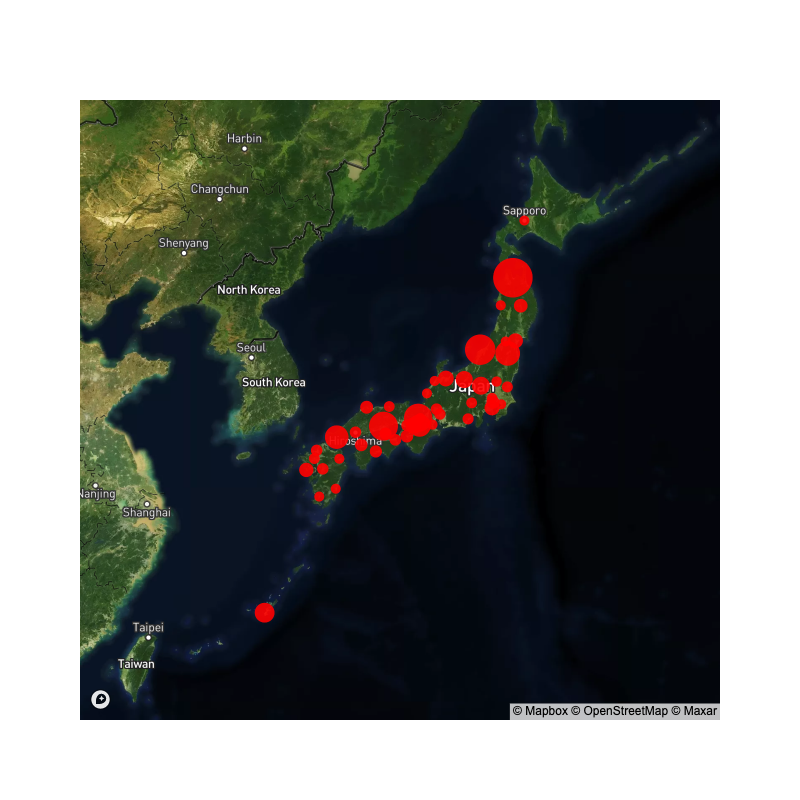

In [ ]:
#| echo: false
Image("../figure/plot_cust.png")

## 製品データの生成関数 generate_prod, generate_many_prod

製品名は仮想のデータとし、大文字のアルファベットとする．

製品名をA，B，C．．．とする場合には，26以下の整数を製品数num_prodに指定する(generate_prod)．より大きい問題例の場合には，製品名を"prod1"のように数字をつけて表す(generate_many_prod)．

基本となる製品は、以下のデータをもつ。

- weight: 製品の重量を表す。これは引数 weight_bound （下限と上限のタプル） 間の一様乱数によって生成された整数とする。 (単位重量）
- volume: 製品の容積を表す。これは引数 volume_bound （下限と上限のタプル） 間の一様乱数によって生成された整数とする。（単位容積）
- cust_value : 顧客上での製品の価値を表す。これは引数 cust_value_bound　（下限と上限のタプル） 間の一様乱数によって生成された整数とする。（円）
- dc_value : 倉庫上での製品の価値を表す。これは引数 dc_value_bound　（下限と上限のタプル） 間の一様乱数によって生成された整数とする。（円）
- plnt_value : 工場における製品の価値を表す。これは引数 plnt_value_bound　（下限と上限のタプル） 間の一様乱数によって生成された整数とする。（円）
- fixed_cost: 製品の生産固定費用を表す。これは引数fc_bound　（下限と上限のタプル） 間の一様乱数によって生成された整数とする。(円/回)

引数：
- num_prod: 製品数（generate_prodの場合は26以下の整数）
- weight_bound: 製品の重量を生成するための下限と上限のタプル
- volume_bound: 製品の容積を生成するための下限と上限のタプル
- cust_value_bound:　顧客上での製品の価値を生成するための下限と上限のタプル
- dc_value_bound:　倉庫上での製品の価値を生成するための下限と上限のタプル
- plnt_value_bound:　工場における製品の価値を生成するための下限と上限のタプル
- fc_bound: 製品の生産固定費用生成のための下限と上限のタプル
- random_seed: 乱数の種

返値：
- 製品データフレーム

列名：
- name: 製品の名称
- weight: 製品の重量 (単位はkg)
- volume: 製品の容量 (単位は  $m^3$）
- cust_value: 顧客上での製品の価値
- dc_value: 倉庫上での製品の価値
- plnt_value: 工場における製品の価値
- fixed_cost: 製品を生産する際の段取り（固定）費用


In [ ]:
#| export
def generate_prod(num_prod=10, weight_bound=(0, 0), volume_bound=(0, 0), cust_value_bound=(1, 1),
                  dc_value_bound=(1, 1), plnt_value_bound=(1, 1), fc_bound=(1, 1), random_seed =1):
    """
    仮想の製品のデータフレームを生成する関数
    """
    random.seed(random_seed)
    alphabet = string.ascii_uppercase
    assert num_prod<=len(alphabet)
    prod_index = list(alphabet[:num_prod])
    prod_df = pd.DataFrame(data={"name": prod_index,
                                 "weight": [random.randint(weight_bound[0], weight_bound[1]) for i in range(num_prod)],
                                 "volume": [random.randint(volume_bound[0], volume_bound[1]) for i in range(num_prod)],
                                 "cust_value": [random.randint(cust_value_bound[0], cust_value_bound[1]) for i in range(num_prod)],
                                 "dc_value": [random.randint(dc_value_bound[0], dc_value_bound[1]) for i in range(num_prod)],
                                 "plnt_value": [random.randint(plnt_value_bound[0], plnt_value_bound[1]) for i in range(num_prod)],
                                 "fixed_cost": [random.randint(fc_bound[0], fc_bound[1]) for i in range(num_prod)]
                                 })
    return prod_df

In [ ]:
#| export
def generate_many_prod(num_prod=100, weight_bound=(0, 0), volume_bound=(0, 0), cust_value_bound=(1, 1),
                  dc_value_bound=(1, 1), plnt_value_bound=(1, 1), fc_bound=(1, 1), random_seed =1):
    """
    仮想の製品のデータフレーム（２６より大きい）を生成する関数
    """
    random.seed(random_seed)
    prod_index = [ f"prod{p}" for p in range(num_prod)]
    prod_df = pd.DataFrame(data={"name": prod_index,
                                 "weight": [random.randint(weight_bound[0], weight_bound[1]) for i in range(num_prod)],
                                 "volume": [random.randint(volume_bound[0], volume_bound[1]) for i in range(num_prod)],
                                 "cust_value": [random.randint(cust_value_bound[0], cust_value_bound[1]) for i in range(num_prod)],
                                 "dc_value": [random.randint(dc_value_bound[0], dc_value_bound[1]) for i in range(num_prod)],
                                 "plnt_value": [random.randint(plnt_value_bound[0], plnt_value_bound[1]) for i in range(num_prod)],
                                 "fixed_cost": [random.randint(fc_bound[0], fc_bound[1]) for i in range(num_prod)]
                                 })
    return prod_df

### generate_prod関数の使用例

10個の製品をそれらの重量を1以上5以下の整数に、顧客上での価値は5以上10以下の整数に、容積と他の価値は既定値、生産固定費用を10以上20以下の整数になるように設定する。

In [ ]:
prod_df = generate_prod(10, weight_bound=(1, 5), cust_value_bound =(5,10), fc_bound=(10,20))
#prod_df.to_csv(folder+"Prod.csv")
prod_df.head()

,name,weight,volume,cust_value,dc_value,plnt_value,fixed_cost
0,A,2,0,7,1,1,14
1,B,5,0,5,1,1,14
2,C,1,0,5,1,1,19
3,D,3,0,5,1,1,17
4,E,1,0,10,1,1,18


In [ ]:
#prod_df = generate_many_prod(num_prod=100, weight_bound=(0, 0), volume_bound=(0, 10), cust_value_bound=(1, 10))
#prod_df.head()         


## 需要データの生成関数 generate_demand 

顧客データと製品データを与えると、仮想の需要データを生成する関数を準備しておく。
需要は、以下のパラメータを用いて生成される。基本的な分布はパレート分布とし、週次ならびに月次の波動と誤差項を加える。

引数：
- cust_df: 顧客データフレーム
- prod_df: 製品データフレーム
- cust_shape: 顧客のパレート分布の形状を定める定数 （正の値であり，小さいほど分布が偏る．）
- prod_shape: 製品のパレート分布の形状を定める定数 （正の値であり，小さいほど分布が偏る．）
- weekly_ratio: 週次の波動を表すリスト（０が日曜日）；長さは7
- yearly_ratio: 年次の波動を表すリスト（０が1月）；長さは12
- start: 開始日
- periods: 計画期間数
- epsilon: 誤差項（平均は $0$）の標準偏差
- correlation: 製品間の誤差項の相関（$-1$から$1$の浮動小数点数）
- random_seed: 乱数の種

返値：
- demand_df: 需要データフレーム

列名:
- date: 日付
- cust: 顧客名
- prod: 製品名
- demand: 需要量


In [ ]:
#| export
def generate_demand(cust_df, prod_df, cust_shape=1.7, prod_shape=1.7,
                    weekly_ratio=[1]*7, yearly_ratio=[1]*12, start="2019/01/01", periods=365, 
                    epsilon=0., correlation = 0.8, random_seed = 1):
    """
    ランダムな需要を生成する関数
    """
    np.random.seed(random_seed)
    random.seed(random_seed)
    cust_col, prod_col, demand_col = [], [], []
    date_col = []
    # パレート分布を用いて基本需要を生成
    cust_basic = np.random.pareto(cust_shape, len(cust_df))
    prod_basic = np.random.pareto(prod_shape, len(prod_df))

    yearly_ratio = [0] + yearly_ratio  # 1月から開始するためダミーの0月を追加
  
    # 共分散行列
    num_prods = len(prod_df)
    cov_matrix = np.ones(shape=(num_prods,num_prods))*(epsilon**2)
    for i in range(num_prods-1):
        for j in range(i,num_prods):
            if i!=j:
                cov_matrix[i,j] *= correlation 
                cov_matrix[j,i] = cov_matrix[i,j]
    #製品ごとの誤差項
    error = np.random.multivariate_normal(np.zeros(shape=(num_prods,)), cov_matrix)

    for t in pd.date_range(start, periods=periods):
        for i, c in enumerate(cust_df.name):
            for j, p in enumerate(prod_df.name):
                date_col.append(t)
                cust_col.append(c)
                prod_col.append(p)
                rand_dem = max(int(cust_basic[i]*prod_basic[j]*weekly_ratio[t.weekday()]*yearly_ratio[t.month]
                                   + error[j]), 0)
                demand_col.append(rand_dem)

    demand_df = pd.DataFrame(
        data={"date": date_col, "cust": cust_col, "prod": prod_col, "demand": demand_col})
    return demand_df

### generate_demand関数の使用例

In [ ]:
# weekly_ratio = [1.0, 1.0, 1.2, 1.3, 0.9, 1.5, 0.2]  # 0 means Sunday
# yearly_ratio = [1.0 + np.sin(i) for i in range(13)]  # 0 means January
# demand_df = generate_demand(cust_df, prod_df, cust_shape=1.7, prod_shape=1.6, weekly_ratio=weekly_ratio, yearly_ratio=yearly_ratio,
#                             start="2019/01/01", periods=365, epsilon=1., correlation=0.8)
# #demand_df.to_csv(folder + "demand_all.csv")
# demand_df.head()

In [ ]:
#| export
def generate_demand_normal(cust_df, prod_df, cust_loc, cust_scale, prod_loc, prod_scale, 
                    weekly_ratio=[1]*7, yearly_ratio=[1]*12, start="2019/01/01", periods=365, epsilon=0., random_seed = 1):
    """
    ランダムな正規分布の需要を生成する関数
    """
    np.random.seed(random_seed)
    random.seed(random_seed)
    cust_col, prod_col, demand_col = [], [], []
    date_col = []
    # 基本需要を生成
    cust_basic = np.random.normal(cust_loc, cust_scale, len(cust_df))
    prod_basic = np.random.normal(prod_loc, prod_scale, len(prod_df))

    yearly_ratio = [0] + yearly_ratio  # 1月から開始するためダミーの0月を追加

    for t in pd.date_range(start, periods=periods):
        for i, c in enumerate(cust_df.name):
            for j, p in enumerate(prod_df.name):
                date_col.append(t)
                cust_col.append(c)
                prod_col.append(p)
                rand_dem = max(int(cust_basic[i]*prod_basic[j]*weekly_ratio[t.weekday()]*yearly_ratio[t.month]
                                   + random.gauss(0, epsilon)), 0)
                demand_col.append(rand_dem)

    demand_df = pd.DataFrame(
        data={"date": date_col, "cust": cust_col, "prod": prod_col, "demand": demand_col})
    return demand_df

### generate_demand_normal関数の使用例

In [ ]:
# weekly_ratio = [1.1, 1.2, 1.0, 0.9, 0.8, 0.95, 1.0]  # 0 means Sunday
# yearly_ratio = [1.0 + 0.1*np.sin(i) for i in range(13)]  # 0 means January
# demand_df = generate_demand_normal(cust_df, prod_df, cust_loc=100., cust_scale=10, prod_loc=10., prod_scale=4., weekly_ratio=weekly_ratio, yearly_ratio=yearly_ratio,
#                             start="2019/01/01", periods=365, epsilon=100.)
# demand_df.to_csv(folder + "demand_normal.csv")
# demand_df.head()

## プロモーション情報の生成とプロモーションを加味した需要の生成関数 generate_demand_with_promo

引数：
- cust_df: 顧客データフレーム
- prod_df: 製品データフレーム
- promo_df: プロモーション情報を入れたデータフレーム（promo_dfは、需要と同じ日付を入れた列dateと、プロモーション名を列名とし、プロモーションを行ったとき1になる列を持つものとする。）
- cust_shape: 顧客のパレート分布の形状を定める定数 
- prod_shape: 製品のパレート分布の形状を定める定数
- weekly_ratio: 週次の波動を表すリスト（０が日曜日）；長さは7
- yearly_ratio: 年次の波動を表すリスト（０が1月）；長さは12
- start: 開始日
- periods: 計画期間数
- epsilon: 誤差項（平均は $0$）の標準偏差
- correlation: 製品間の誤差項の相関（$-1$から$1$の浮動小数点数）
- promo_0_ratio: プロモーション0が発生したときの需要の倍率（1からこの値までの一様乱数とする）．
- promo_1_ratio: プロモーション1が発生したときの需要の倍率（1からこの値までの一様乱数とする）．
- 
返値：
- demand_df: プロモーション情報を加味した需要データフレーム

In [ ]:
#| export
def generate_demand_with_promo(cust_df, prod_df, promo_df, cust_shape=1.7, prod_shape=1.7,
                    weekly_ratio=[1]*7, yearly_ratio=[1]*12, start="2019/01/01", periods=365, epsilon=0. ,
                              promo_0_ratio=1.5, promo_1_ratio=2.0, correlation = 0.8, random_seed = 1):
    """
    プロモーション情報を加味したランダムな需要を生成する関数
    """
    np.random.seed(random_seed)
    random.seed(random_seed)

    promo_df.set_index("date", inplace=True)

    cust_col, prod_col, demand_col = [], [], []
    date_col = []
    # パレート分布を用いて基本需要を生成
    cust_basic = 1. + np.random.pareto(cust_shape, len(cust_df))
    prod_basic = 1. + np.random.pareto(prod_shape, len(prod_df))

    #顧客と製品の基本値に乗じるプロモーションの効果（promo_0は顧客に、promo_1は製品に対してかかるものとする。）
    cust_promo = np.random.uniform(1.0, promo_0_ratio, len(cust_df))
    prod_promo = np.random.uniform(1.0, promo_1_ratio, len(prod_df))

    yearly_ratio = [0] + yearly_ratio  # 1月から開始するためダミーの0月を追加

    #製品間の相関を加味
    # 共分散行列
    num_prods = len(prod_df)
    cov_matrix = np.ones(shape=(num_prods,num_prods))*(epsilon**2)
    for i in range(num_prods-1):
        for j in range(i,num_prods):
            if i!=j:
                cov_matrix[i,j] *= correlation 
                cov_matrix[j,i] = cov_matrix[i,j]
    #製品ごとの誤差項
    error = np.random.multivariate_normal(np.zeros(shape=(num_prods,)), cov_matrix)
    
    promo0_col, promo1_col = [], []
    for idx, t in enumerate(pd.date_range(start, periods=periods)):
        for i, c in enumerate(cust_df.name):
            for j, p in enumerate(prod_df.name):
                date_col.append(t)
                cust_col.append(c)
                prod_col.append(p)
                promo_0 = promo_df.iloc[idx,0]
                promo_1 = promo_df.iloc[idx,1]
                if promo_0:
                    rand_dem = max(int(cust_promo[i]*cust_basic[i]*prod_basic[j]*weekly_ratio[t.weekday()]*yearly_ratio[t.month]
                                   + error[j]), 0)
                elif promo_1:
                    rand_dem = max(int(prod_promo[j]*cust_basic[i]*prod_basic[j]*weekly_ratio[t.weekday()]*yearly_ratio[t.month]
                                   + error[j]), 0)
                else:
                    rand_dem = max(int(cust_basic[i]*prod_basic[j]*weekly_ratio[t.weekday()]*yearly_ratio[t.month]
                                   + error[j]), 0)
                demand_col.append(rand_dem)
                promo0_col.append(promo_0)
                promo1_col.append(promo_1)

    demand_df = pd.DataFrame(
        data={"date": date_col, "cust": cust_col, "prod": prod_col,
              "promo_0":promo0_col, "promo_1":promo1_col, "demand": demand_col})
    return demand_df, cust_promo, prod_promo

### generate_demand_with_promo関数の使用例

プロモーション情報を加えた需要データを生成しておく。プロモーション情報は、promo_dfデータフレームに保管してあるものとする。

promo_dfは、需要と同じ日付を入れた列dateと、プロモーション名を列名とし、その効果を列データとした列を持つものとする。

In [ ]:
start="2019/01/01"
periods =365*3
date_col = []
num_promo =2 
promo_cols = [ [] for promo_ in range(num_promo)]
for t in pd.date_range(start, periods=periods):
    date_col.append(t)
    if t.weekday() == 2:  # Tsuesday promotion 
        promo_cols[0].append(1)
    else:
        promo_cols[0].append(0)
    if t.day%10 ==0: # 10th, 20th 30th day promotion
        promo_cols[1].append(1)
    else:
        promo_cols[1].append(0)

promo_df = pd.DataFrame(data={"date": date_col, "promo_0": promo_cols[0], "promo_1": promo_cols[1]})
#promo_df.head(20)
#promo_df.to_csv(folder + "promo.csv")
promo_df.head()

,date,promo_0,promo_1
0,2019-01-01,0,0
1,2019-01-02,1,0
2,2019-01-03,0,0
3,2019-01-04,0,0
4,2019-01-05,0,0


In [ ]:
# cust_df = pd.read_csv(folder+"cust.csv")
# prod_df = pd.read_csv(folder+"prod.csv")
# promo_df = pd.read_csv(folder+"promo.csv", index_col=0)
# weekly_ratio = [1.1, 2.0, 2.2, 2.3, 1.9, 2.5, 1.2]   # 0 means Sunday
# yearly_ratio = [2.0 + np.sin(i) for i in range(13)]  # 0 means January
# demand_with_promo_df, cust_promo, prod_promo = generate_demand_with_promo(cust_df[:], prod_df[:], promo_df, 
#                                                   cust_shape=1.7, prod_shape=1.6, weekly_ratio=weekly_ratio, yearly_ratio=yearly_ratio,
#                                                   start="2019/01/01", periods=365*2, epsilon=1.)
#demand_with_promo_df.to_csv(folder + "demand_with_promo_all.csv")

In [ ]:
#demand_with_promo_df.head()

## 予約需要の生成関数 generate_reservation_demand

収益管理で用いるランダムな予約需要データフレームを生成する。

引数：
- class_df: 予約のクラスを表すデータフレーム； class_name列と基本需要（Possion分布に与える平均需要）を表す列 basic_demandをもつ。
- weekly_ratio: 週次の波動を表すリスト（０が日曜日）；長さは7
- start: 開始日
- periods: 計画期間数
- max_lt: 予約可能な日が何日前かを表すパラメータ

返値：
- reserve_demand_df: 予約需要データフレーム

In [ ]:
#| export
def generate_reservation_demand(class_df, weekly_ratio=[1]*7, start="2019/01/01", periods=7, max_lt = 1):
    """
    ランダムな予約需要を生成する関数
    """
    reserve_col, checkin_col, class_col, demand_col = [], [], [], []

    # Poisson分布を用いて需要を生成
    for checkin_t in pd.date_range(pd.to_datetime(start) + datetime.timedelta(max_lt), periods=periods-max_lt):
        for reserve_t in pd.date_range(checkin_t-datetime.timedelta(max_lt), periods=max_lt+1): # allow the same day reservation
            for i, c in enumerate(class_df.class_name):
                checkin_col.append(checkin_t)
                reserve_col.append(reserve_t)
                class_col.append(c)
                rand_dem = max(np.random.poisson(class_df.basic_demand[i]*weekly_ratio[reserve_t.weekday()],1)[0] , 0)
                demand_col.append(rand_dem)

    reserve_demand_df = pd.DataFrame(
        data={"reserve": reserve_col, "checkin": checkin_col, "class_name": class_col, "demand": demand_col})
    return reserve_demand_df

### generate_reservation_demand関数の使用例

In [ ]:
# class_df = pd.DataFrame({"class_name":["C","B","A"], "basic_demand": [20, 10, 5]})
# weekly_ratio = [0.0, 1.0, 1.2, 1.3, 0.9, 1.5, 0.2]  # 0 means Sunday
# start="2019/01/01"
# periods = 60
# max_lt = 30 # reservation in starts max_lt before check-in day 
# reserve_demand_df = generate_reservation_demand(class_df, weekly_ratio=[1]*7, start="2019/01/01", periods=7, max_lt = 1)
# reserve_demand_df.to_csv(folder+"reserve_demand.csv")
# reserve_demand_df.head()

## OD需要量の生成

サービスネットワーク設計問題に対しては、地点間の需要量を定義する必要がある。荷物の始点を発生地点(origin）、終点を集中地点(destination）と呼ぶ。
地点間の需要量は、ODフロー量と呼ばれる。

ここでは、重力法 (gravity method) を用いて需要量を算出する。
県別の人口を入れた顧客データを読み込み、以下の式によって地点 $i$ から地点 $j$ へのODフロー量を計算する。

記号：
- $P_i$ : 地点 $i$ の人口
- $d_{ij}$ : 地点 $i,j$ 間の距離（ここでは大圏距離とする。） 
- $D_{ij}$ : 地点 $i,j$ 間のODフロー量
- $\alpha$ : 発生地点の人口がODフロー量に与える影響度
- $\beta$ : 集中地点の人口がODフロー量に与える影響度

重力法：
$$
  D_{ij}=  P_i^{\alpha} P_j^{\beta}/d_{ij}
$$

都道府県の人口を入れたデータCust_with_population.csvを読み込む。

In [ ]:
# #人口データの付加
# cust_df = pd.read_csv(folder+"Cust.csv", index_col=0)
# pop_df = pd.read_csv("population.csv")
# cust_df.reset_index(inplace=True)
# cust_df["population"] = pop_df["pop"].str.replace(",","").astype(float)
# cust_df.to_csv(folder + "Cust_with_population.csv")

In [ ]:
# cust_df = pd.read_csv(folder+"Cust_with_population.csv", index_col=0)
# cust_df.head()

In [ ]:
# n = len(cust_df)
# D = np.zeros( (n,n) )
# Distance = np.zeros( (n,n) )
# alpha, beta = 1.,0.5
# for i, row1 in enumerate(cust_df.itertuples()):
#     for j, row2 in enumerate(cust_df.itertuples()):
#         if i==j:
#             D[i,j] = 0.
#         else:
#             D[i,j] = (row1.population**alpha) * (row2.population**beta) /great_circle( (row1.lat, row1.lon), (row2.lat,row2.lon)).km
#             Distance[i,j] = great_circle( (row1.lat, row1.lon), (row2.lat,row2.lon)).km

In [ ]:
# od_df = pd.DataFrame(D, index=cust_df.name, columns=cust_df.name)
# od_df.head()

In [ ]:
#heatmap
#fig = px.imshow(D)
#fig.show()
#od_df.to_csv(folder + "od.csv")

#hide
## 実際問題のデータの読み込み

実際問題を解きたい場合には、上と同じ形式のデータを作成して読みこむ。

### Plotly Expressによる需要の変化の図示

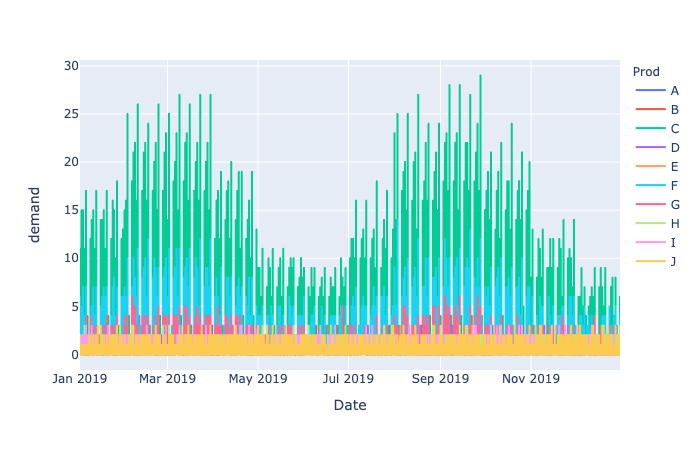

In [ ]:
#fig = px.line(demand_df, x="date",  y="demand", color ="prod")
#fig = px.line(demand_with_promo_df, x="date",  y="demand", color ="prod")
#plotly.offline.plot(fig)
Image("../figure/demand_series.png")

### Plotly Expressによる需要のヒストグラムの図示

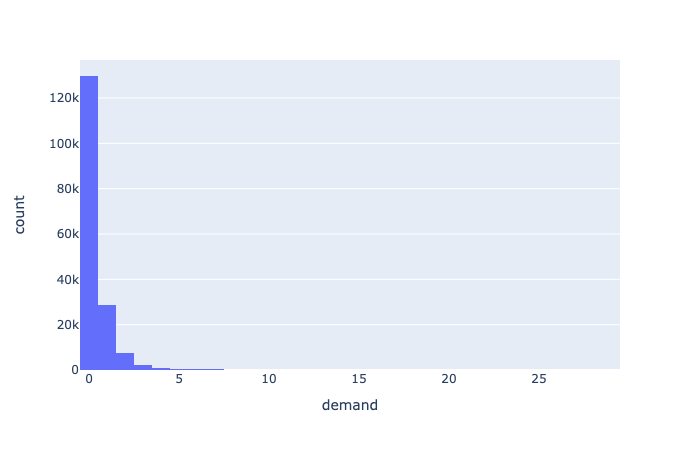

In [ ]:
#fig = px.histogram(demand_df, x="demand")
#fig = px.histogram(demand_with_promo_df, x="demand")
#plotly.offline.plot(fig)
Image("../figure/demand_hist.png")

## 需要の属性を生成する関数 demand_attribute_compute

需要量に応じて、以下のような諸量を計算し、需要データフレームに属性（列）として追加する関数

- 製品の売り上げ: 需要と製品の顧客上での価値（$=$価格）の積
- 重量合計：需要量と製品重量の積
- 容積合計：需要量と製品容積の積

引数：

- demand_df : 需要データフレーム
- prod_df : 製品データフレーム
- attribute_col_name : 需要にかけ合わせる製品データの列名；例えば、売り上げを計算したい場合には "cust_value" とする。
- new_col_name : 計算結果を格納するための列名；例えば、売り上げを保管したい場合には "sales" とする。

返値：

- 新しい列を追加した需要データフレーム

In [ ]:
#| export
def demand_attribute_compute(demand_df, prod_df, attribute_col_name, new_col_name):
    """
    需要データに新たな属性を追加する関数
    """
    assert attribute_col_name in prod_df.columns
    col_list = prod_df[attribute_col_name]
    dic ={}
    for i, name in enumerate(prod_df.name):
        dic[name] = col_list[i]
    new_col_list =[]
    for row in demand_df.itertuples():
        new_col_list.append( row.demand * dic[row.prod] )
    demand_df[new_col_name] = new_col_list
    return demand_df

### demand_attribute_compute関数の使用例

In [ ]:
# demand_df = demand_attribute_compute(demand_df, prod_df, "cust_value", "sales")
# #demand_df.to_csv(folder + "demand.csv")
# demand_df.head()

## 倉庫データの生成関数 generate_dc

倉庫の開設可能地点は、全ての顧客上と仮定する。
製品ごとの需要に製品の重量 weight を乗じたものの合計を計算し、それを倉庫の予定開設個数で割ることによって、倉庫の容量を設定する。
倉庫の容量の下限と上限を決める率 lb_ratio, ub_ratio を乗じて、下限と上限を決める。

引数：
- cust_df: 顧客データフレーム
- demand_df: 需要データフレーム
- prod_df: 製品データフレーム
- num_dc =5: 目標とする倉庫数（これにあわせて容量を決める．
- lb_ratio=0.8: 容量の下限を決めるパラメータ
- ub_ratio =1.2: 容量の上限を決めるパラメータ
- vc_bound =(0.,0.5): 変動費用の下限と上限を表すパラメータ
- fc_bound =(10000,10000): 固定費用の下限と上限を表すパラメータ
- random_seed: 乱数の種

返値のデータフレームの列名と意味は以下の通り．

- name: 倉庫名称
- lb: 容量下限 
- ub: 容量上限
- fc: 固定費用
- vc: 変動費用
- lat: 緯度
- lon: 経度


In [ ]:
#| export
def generate_dc(cust_df, demand_df, prod_df, num_dc=5, lb_ratio=0.8, ub_ratio=1.2, vc_bounds=(0.0, 0.5), fc_bounds=(10000,11000), random_seed=1):
    """
    倉庫データの生成：
    顧客データ、需要データ、製品データ、予定開設数、倉庫の容量を決めるための下限率、上限率を与えると、倉庫データを返す。
    """
    assert num_dc > 0
    assert lb_ratio < ub_ratio
    np.random.seed(random_seed)
    
    total_demand = pd.pivot_table(
        demand_df, index="prod", values="demand", aggfunc=sum)
    #total_demand.head()

    #total_weight = (total_demand.demand.values * prod_df.weight.values[:len(total_demand.demand.values)]).sum()
    total_weight = total_demand.demand.values.sum()
    average_capacity = total_weight/num_dc
    fixed_cost = np.random.randint( fc_bounds[0],fc_bounds[1], len(cust_df) ) 
    variable_cost = np.random.uniform( vc_bounds[0], vc_bounds[1], len(cust_df) )
    dc_df = pd.DataFrame(data={"name": cust_df.name.tolist(), "lb": average_capacity*lb_ratio, "ub": average_capacity*ub_ratio, "fc": fixed_cost, "vc": variable_cost,
                               "lat": cust_df.lat.tolist(), "lon": cust_df.lon.tolist()})
    return dc_df

## generate_dc関数の使用例

In [ ]:
# demand_df = pd.read_csv(folder+"demand.csv")
# dc_df = generate_dc(cust_df, demand_df, prod_df, num_dc=5, lb_ratio=0.0, ub_ratio=10.3)
# dc_df.to_csv(folder + "DC.csv")
# dc_df.head()

## 工場データと生産情報データの生成関数 generate_plnt

工場は3つで、小田原、大阪、千葉にあると仮定する。
大阪工場では約半分の製品を、千葉では大阪工場で製造していない約半分の製品を生産でき、小田原工場では全ての製品を生産できるものとする。
生産容量は、総需要量と設定しておく。

引数：

- prod_df : 製品データフレーム
- demand_df : 需要データフレーム
- lead_time_bound: 工場での生産リード時間を決めるためのパラメータ； タプルで与えた下限と上限の間の一様整数乱数とする。 

返値：

- plnt_df: 工場データフレーム
- plnt_prod_df: 工場・製品データフレーム


In [ ]:
#| export
def generate_plnt(prod_df, demand_df, lead_time_bound= (1,2), random_seed = 1):
    """
    工場データの生成
    """
    np.random.seed(random_seed)
    
    plnt_list=["Odawara","Osaka","Chiba"]
    plnt_lat =[35.2849816, 34.5631009, 35.5434516]
    plnt_lon =[139.1961334, 135.4151286, 140.1139081]
    plnt_df = pd.DataFrame(data={"name":plnt_list,  "lat":plnt_lat, "lon":plnt_lon} )

    products = list(set(demand_df["prod"]))
    num_prod = len(products)

    num_prod_osaka = num_prod//2
    num_prod_chiba = num_prod - num_prod_osaka
    plnt_col = ["Osaka"]*num_prod_osaka + ["Chiba"] * num_prod_chiba + ["Odawara"]*num_prod
    prod_col = products[:num_prod_osaka] + products[num_prod_osaka:num_prod] + products[:num_prod]
    ub_col = []
    lt_col = []
    dem = pd.pivot_table(demand_df, index="prod", values="demand", aggfunc=sum)
    for p in prod_col:
        ub_col.append( dem.loc[p].demand)
        lt_col.append( np.random.randint(lead_time_bound[0],lead_time_bound[1]))
    plnt_prod_df = pd.DataFrame(
        data={"plnt": plnt_col,  "prod": prod_col, "ub": ub_col, "lead_time": lt_col})

    return plnt_df, plnt_prod_df

### generate_plnt関数の使用例

In [ ]:
# prod_df = pd.read_csv(folder+"prod.csv")
# demand_df = pd.read_csv(folder+"demand.csv")
# plnt_df, plnt_prod_df = generate_plnt(prod_df, demand_df, lead_time_bound=(25,30))
# plnt_df.to_csv(folder + "Plnt.csv")
# plnt_df.head()

In [ ]:
# plnt_prod_df.to_csv(folder + "Plnt-Prod.csv")
# plnt_prod_df.head()